In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Load the dataset into python environment
data=pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
data.fillna(data.median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [8]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.value_counts("Classification")

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [10]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

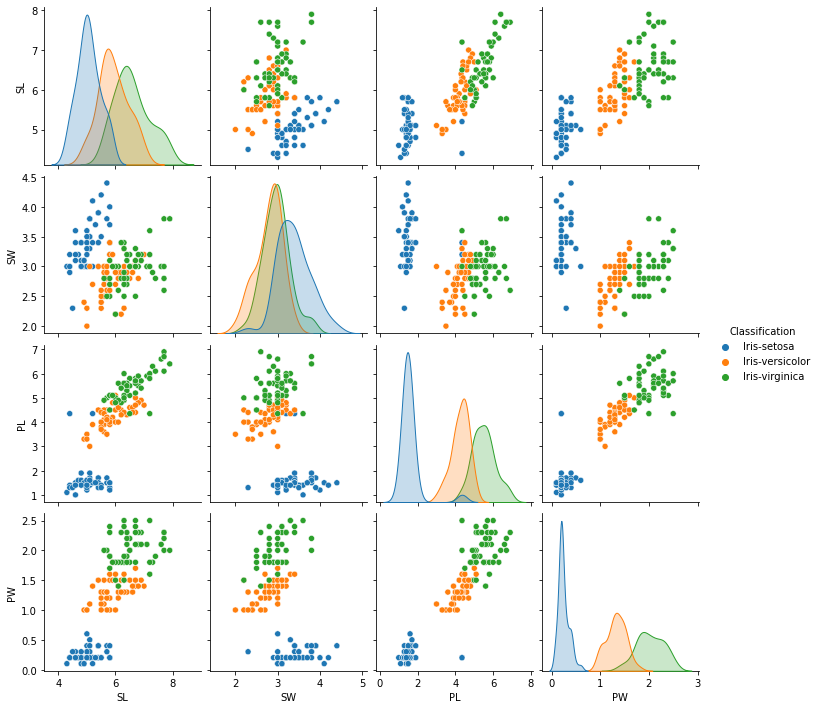

In [11]:
sns.pairplot(data, hue='Classification')
plt.show()

In [12]:
y = data['Classification']
x = data.drop('Classification', axis=1)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

  Logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
logit_model = lr.fit(x_train, y_train)
y_predict_logit = logit_model.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [16]:
confusion_matrix(y_test,y_predict_logit)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [17]:
accuracy_score(y_test,y_predict_logit)

1.0

kNN Model

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [20]:
metric_k = []
neighbors = range(1,25)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier = classifier.fit(x_train,y_train)
  y_pred_kNN = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred_kNN)
  metric_k.append(acc)

In [21]:
metric_k

[1.0,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

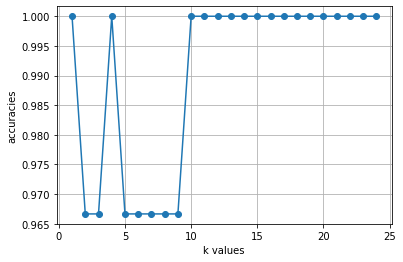

In [22]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid()

In [23]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier = classifier.fit(x_train,y_train)
y_pred_kNN = classifier.predict(x_test)

In [24]:
confusion_matrix(y_test,y_pred_kNN)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [25]:
accuracy_score(y_test,y_pred_kNN)

1.0

SVM Model

In [26]:
from sklearn.svm import SVC

In [27]:
clf_svm = SVC(kernel='linear')
clf_svm = clf_svm.fit(x_train,y_train)
y_pred_svm = clf_svm.predict(x_test)

In [28]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [29]:
accuracy_score(y_test,y_pred_svm)

1.0

DecisionTreeClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt_clf = DecisionTreeClassifier()
df_clf = dt_clf.fit(x_train,y_train)
y_pred_dt = dt_clf.predict(x_test)

In [32]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [33]:
accuracy_score(y_test,y_pred_dt)

1.0

Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(x_train,y_train)
y_pred_clf = rf_clf.predict(x_test)

In [36]:
confusion_matrix(y_test,y_pred_clf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [37]:
accuracy_score(y_test,y_pred_clf)

1.0

Accuracy is equal for all the models.